In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
c = pd.read_csv('household.csv')

In [86]:
c.YRBUILT

0        2000
1        2000
2        1970
3        1970
4        1980
5        1960
6        1970
7        1970
8        1970
9        1970
10       1980
11       1980
12       1950
13       1980
14       1960
15       1950
16       1960
17       1950
18       1919
19       1960
20       1990
21       1990
22       1960
23       1970
24       1980
25       2010
26       1970
27       1919
28       1919
29       1970
         ... 
69463    1990
69464    1990
69465    1919
69466    1980
69467    2010
69468    1970
69469    1980
69470    1919
69471    1960
69472    1940
69473    1920
69474    1950
69475    1970
69476    1980
69477    1919
69478    1919
69479    1990
69480    1970
69481    1930
69482    1970
69483    1920
69484    1919
69485    1950
69486    1940
69487    1990
69488    1970
69489    1960
69490    1980
69491    1920
69492    2000
Name: YRBUILT, dtype: int64

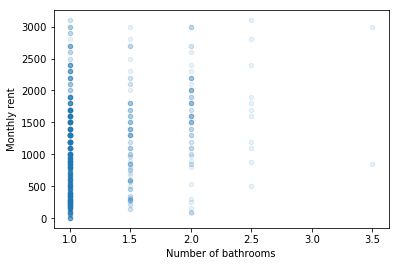

In [81]:
c[(c.OMB13CBSA == "'14460'") & (c.RENT > 0) & (c.RENT < 5000) & (c.intbaths > 0)].plot(kind='scatter', x='intbaths', y='RENT', alpha=0.1)
plt.ylabel('Monthly rent')
plt.xlabel('Number of bathrooms')
plt.show()

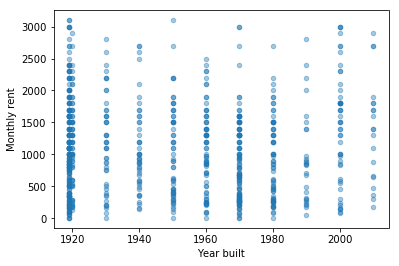

In [90]:
c[(c.OMB13CBSA == "'14460'") & (c.RENT > 0) & (c.RENT < 5000)].plot(kind='scatter', x='YRBUILT', y='RENT', alpha=0.4)
plt.ylabel('Monthly rent')
plt.xlabel('Year built')
plt.show()

In [89]:
from statsmodels.formula.api import ols
mod = ols("RENT ~ YRBUILT", data=c)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   RENT   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5796
Date:                Fri, 17 Nov 2017   Prob (F-statistic):              0.446
Time:                        15:40:51   Log-Likelihood:            -5.5662e+05
No. Observations:               69493   AIC:                         1.113e+06
Df Residuals:                   69491   BIC:                         1.113e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    541.9588    213.691      2.536      0.0

In [27]:
c.intbaths.hist()

In [64]:
def bathroomint(num):
    nums = int(num[1:-1])
    if nums == 1:
        return 1
    elif nums == 2:
        return 1.5
    elif nums == 3:
        return 2
    elif nums == 4:
        return 2.5
    elif nums == 5:
        return 3
    elif nums == 6:
        return 3.5
    else:
        return 0

In [65]:
c['intbaths'] = c.BATHROOMS.apply(bathroomint)

In [73]:
c['intrent'] = c.RENT.apply(lambda num: int(num[1:-1]) if int(num[1:-1]) > 0 else 0)

TypeError: 'int' object is not subscriptable

In [32]:
c.BATHROOMS[0][1:-1]

'02'